# Load and Inspect the data

In [1]:
import pandas as pd

df = pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [2]:
#shape of dataset
df.shape

(150255, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150255 entries, 0 to 150254
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     150255 non-null  int64 
 1   Product_ID                  150255 non-null  object
 2   Gender                      150255 non-null  object
 3   Age                         150255 non-null  object
 4   Occupation                  150255 non-null  int64 
 5   City_Category               150255 non-null  object
 6   Stay_In_Current_City_Years  150255 non-null  object
 7   Marital_Status              150255 non-null  int64 
 8   Product_Category            150255 non-null  int64 
 9   Purchase                    150255 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 11.5+ MB


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,1.502550e+05,150255.000000,150255.000000,150255.000000,150255.000000
mean,1.002930e+06,8.092290,0.408798,5.298532,9308.608991
std,1.687846e+03,6.529104,0.491614,3.747156,4982.877654
min,1.000001e+06,0.000000,0.000000,1.000000,160.000000
25%,1.001451e+06,2.000000,0.000000,1.000000,5848.500000
50%,1.002968e+06,7.000000,0.000000,5.000000,8053.000000
75%,1.004339e+06,14.000000,1.000000,8.000000,12062.000000
max,1.006040e+06,20.000000,1.000000,18.000000,23961.000000


**INSIGHTS:**

* Rows: 425735
* columns: 10
* Purchase is the target Variable
* Categorical columns: (Gender, Age, City_Category, Stay_IN_Current_City_Years, Marital_Status) should be converted to 'category'.

#Data Cleaning

In [5]:
# Step 1: Strip column names
df.columns = df.columns.str.strip()

# Step 2: Handle missing values BEFORE converting to category
# Fill numeric columns
df['Occupation'] = df['Occupation'].fillna(-1).astype(int)
df['Product_Category'] = df['Product_Category'].fillna(-1).astype(int)
df['Purchase'] = df['Purchase'].fillna(-1)

# Fill Marital_Status with -1, then convert to int
if df['Marital_Status'].dtype.name == 'category':
    df['Marital_Status'] = df['Marital_Status'].astype('float')  # revert to float if needed
df['Marital_Status'] = df['Marital_Status'].fillna(-1).astype(int)

# Fill object/categorical columns with 'Unknown'
object_cols = ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for col in object_cols:
    df[col] = df[col].astype(str).fillna('Unknown')

# Step 3: Convert to category
categorical_cols = object_cols + ['Marital_Status']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Final check
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150255 entries, 0 to 150254
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     150255 non-null  int64   
 1   Product_ID                  150255 non-null  category
 2   Gender                      150255 non-null  category
 3   Age                         150255 non-null  category
 4   Occupation                  150255 non-null  int64   
 5   City_Category               150255 non-null  category
 6   Stay_In_Current_City_Years  150255 non-null  category
 7   Marital_Status              150255 non-null  category
 8   Product_Category            150255 non-null  int64   
 9   Purchase                    150255 non-null  int64   
dtypes: category(6), int64(4)
memory usage: 5.7 MB
None
User_ID                       0
Product_ID                    0
Gender                        0
Age                          

#Non-Graphical Analysis

##Gender

In [6]:
df['Gender'].value_counts()

,count
Gender,
M,113676
F,36579


##Marital_Status

In [7]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
0,88831
1,61424


##Age

In [8]:
df['Age'].value_counts()

,count
Age,
26-35,59623
36-45,30239
18-25,27540
46-50,12344
51-55,10605
55+,5820
0-17,4084


##City_Category

In [9]:
df['City_Category'].value_counts()

,count
City_Category,
B,63503
C,46632
A,40120


##Unique Attributes

In [10]:
df.nunique()

,0
User_ID,5873
Product_ID,3417
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,18
Purchase,15073


**Insights:**

* Gender and Marital Status are binary - Ideal for segmentation.
* Age and Occupation offer rich diversity - Useful for life-stage and career-based targeting.
* City_Category shows skew - Walmart may have more data from Tier 2 cities (B and C).
* Product_ID and User_ID are highly unique -> good for personalization and product-level analysis.

#Univariante Analysis

##Continuous Variables (Purchase, Product_Category)

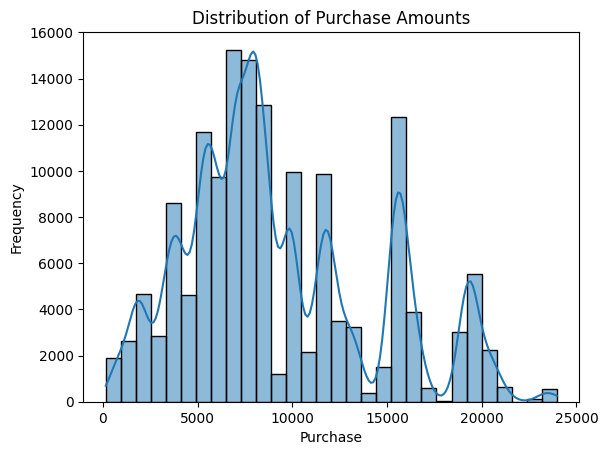

In [13]:
# Distribution plot for Purchase
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Purchase'], kde=True, bins=30)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.show()

**INSIGHTS**

* Multiple peaks suggest distinct spending tiers (e.g., budget vs. premium).
* Right-skewed tail shows a few high-value transactions — likely bulk or tech purchases.
* Most purchases fall in the ₹5,000–₹10,000 range, Walmart’s core zone.
* Outliers exist and may represent VIP or high-intent buyers.

**RECOMMENDATIONS:**

* Focus inventory and promotions in the ₹5K–₹10K range.
* Create premium bundles for high-spend customers.
* Use tiered pricing to match spending clusters.

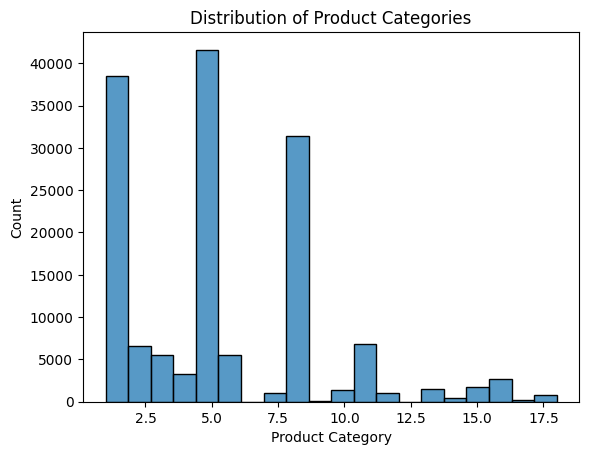

In [14]:
# Histogram for Product_Category
sns.histplot(df['Product_Category'], bins=20)
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

**INSIGHTS:**

* Category 1 and 5 dominate the dataset — they have the highest transaction counts.
* Several categories have very low frequency, suggesting niche or underperforming segments.
* The distribution is highly skewed, with a few categories driving most of the volume.
* This pattern may reflect customer preferences, inventory focus, or seasonal demand.

**RECOMMENDATIONS:**

* Prioritize stocking and promoting high-frequency categories (e.g., 1 and 5).
* Investigate low-frequency categories for potential phase-out or targeted marketing.
* Use this distribution to optimize shelf space, inventory planning, and category-level promotions.

##Categorical Variables (eg: Gender, Age, City_Category)

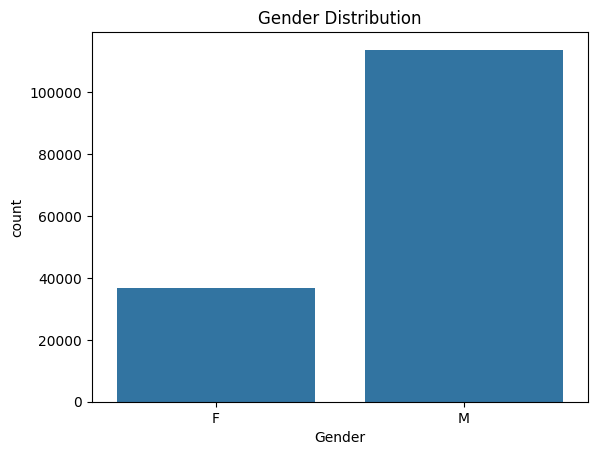

In [15]:
# Countplot for Gender
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

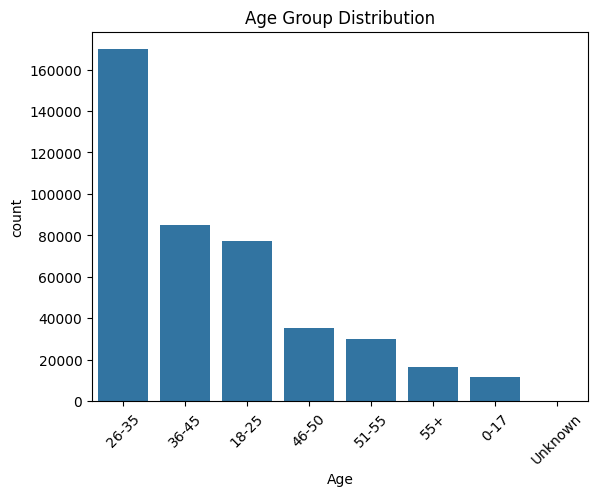

In [ ]:
#Countplot for Age
sns.countplot(x='Age', data=df, order=df['Age'].value_counts().index)
plt.title('Age Group Distribution')
plt.xticks(rotation=45)
plt.show()

**INSIGHTS:**

* 26–35 age group dominates the dataset — highest customer count.
* Followed by 36–45 and 18–25, indicating strong engagement from young and mid-career adults.
* Older age groups (46+) show progressively lower counts, suggesting reduced digital or retail activity.
* Presence of ‘Unknown’ category may indicate missing or unclassified data — worth cleaning or segmenting.

**RECOMMENDATIONS:**

* Focus marketing and product strategy on 18–45 age range — they form the bulk of the customer base.
* For older groups, promote wellness, comfort, and easy-to-use tech to boost engagement.

#BiVariate Analysis

##Boxplots for Categorical Vs Continuous

####Purchase by Gender

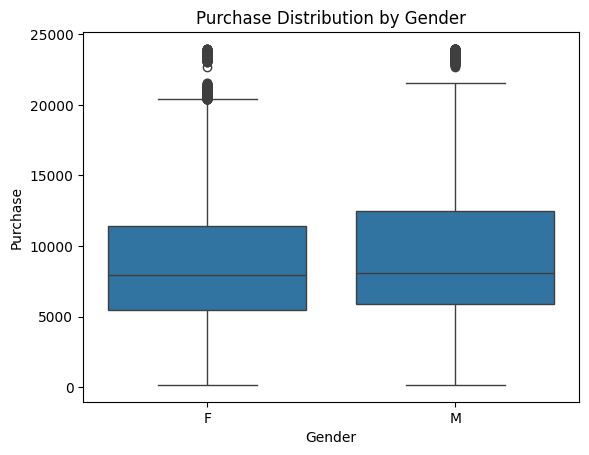

In [16]:
# Purchase by Gender
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title('Purchase Distribution by Gender')
plt.show()

**Insights:**

* Median purchase amounts for male and female customers are similar.
* Male distribution is wider, indicating more variability in spending.
* Both genders show high-value outliers, suggesting occasional large purchases.
* The interquartile range (IQR) is slightly larger for males, hinting at broader spending behavior.

**Recommendations:**
* For male customers: promote premium bundles and high-ticket items.
* For female customers: explore category-specific promotions to increase basket size.
* Use this variability to personalize offers based on spending patterns.

#### Purchase by Age

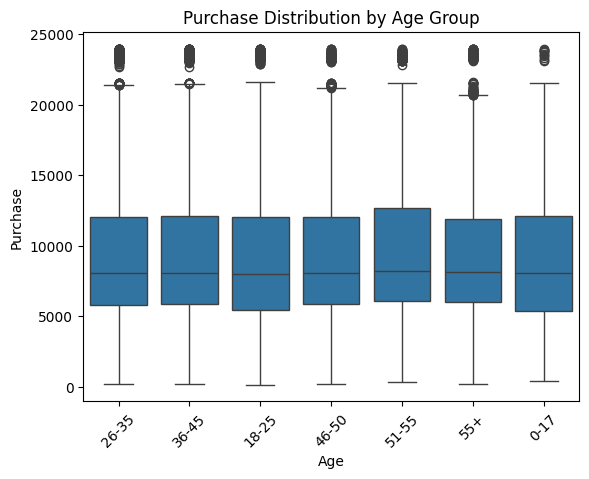

In [17]:
sns.boxplot(x='Age', y='Purchase', data=df, order=df['Age'].value_counts().index)
plt.title('Purchase Distribution by Age Group')
plt.xticks(rotation=45)
plt.show()

**INSIGHTS:**

* 51+ age group shows the highest median purchase, indicating strong spending power.
* 36–50 and 26–35 also show high and stable spending — likely driven by family and lifestyle needs.
* 18–25 and 0–17 have lower medians and tighter ranges, reflecting budget-conscious behavior.
* All age groups show outliers, suggesting occasional high-value purchases across demographics.

**RECOMMENDATIONS:**

* Target 51+ customers with premium, wellness, and comfort-focused products.
* For 26–50, promote family bundles, tech, and convenience items.
* Offer budget-friendly deals and aspirational branding for younger groups (18–25, 0–17).

####Purchase by Marital Status

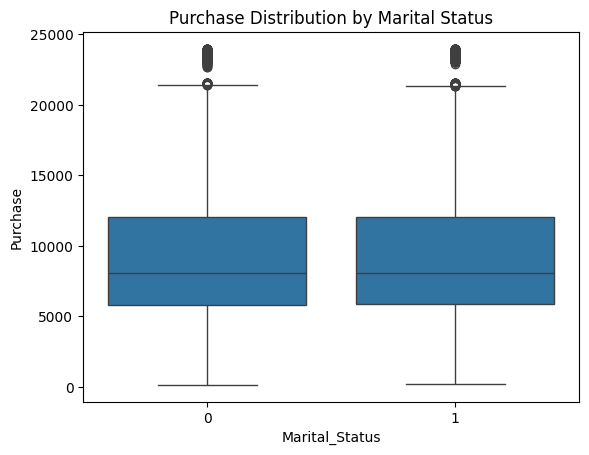

In [18]:
sns.boxplot(x='Marital_Status', y='Purchase', data=df)
plt.title('Purchase Distribution by Marital Status')
plt.show()

**INSIGHTS:**

* Median purchase amounts for married and unmarried customers are nearly identical.
* Both groups show similar interquartile ranges, indicating comparable spending behavior.
* Outliers exist in both categories, suggesting occasional high-value purchases across marital statuses.
* No strong visual evidence of spending disparity based on marital status.

**RECOMMENDATIONS:**

* Avoid over-segmentation by marital status — focus on life stage, age, or product preferences instead.
* Use similar promotional strategies for both groups, but personalize based on purchase history or household size.

#Correction Analysis

##Heatmap for Numeric Features

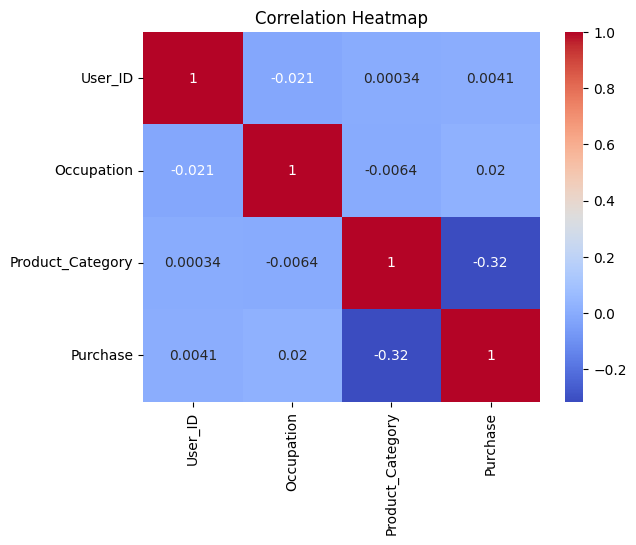

In [19]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**INSIGHTS:**

* 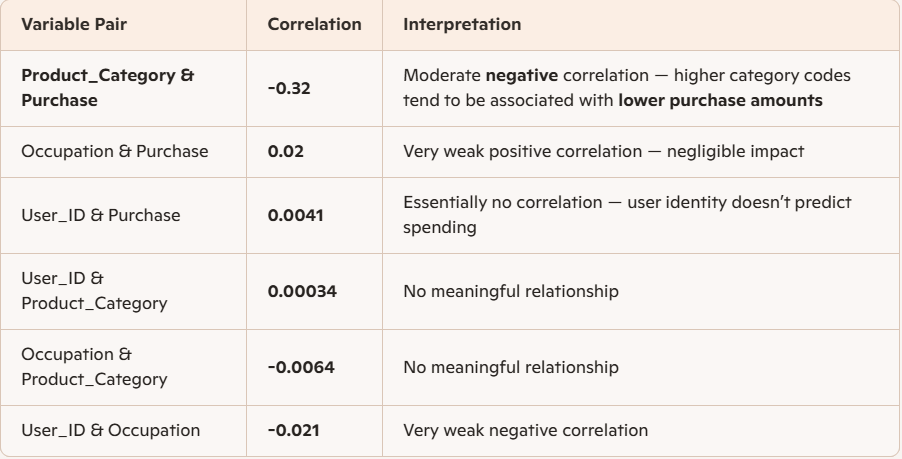

**RECOMMENDATIONS**

* Focus on Product_Category as a key variable — but note that higher category codes may not mean higher spend.
* Avoid using User_ID or Occupation as predictors in modeling — they offer minimal insight.
* Consider reclassifying product categories if numeric codes don’t reflect value tiers.

##Pairplot for continuous Relationships

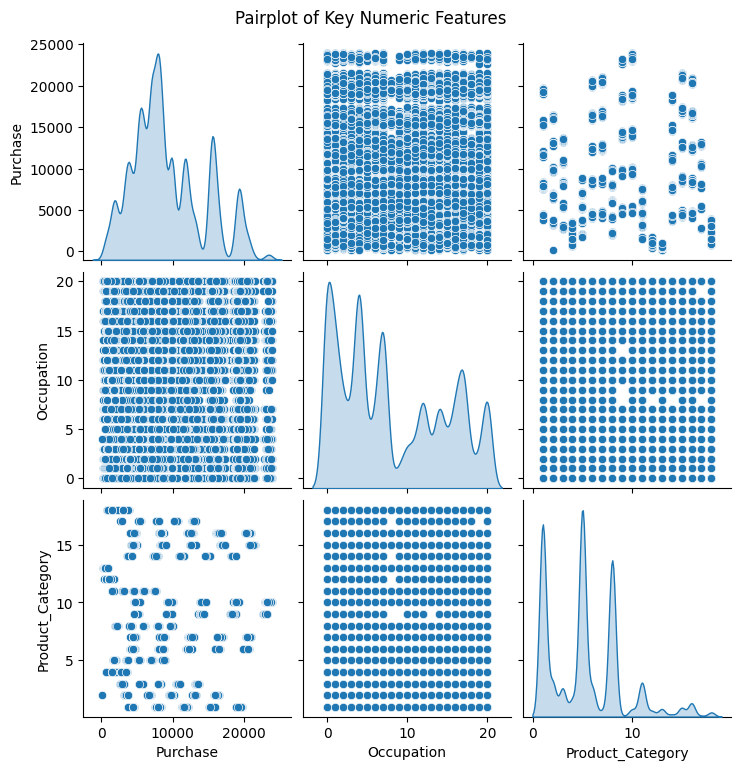

In [20]:
# Pairplot for selected numeric features
sns.pairplot(df[['Purchase', 'Occupation', 'Product_Category']], diag_kind='kde')
plt.suptitle('Pairplot of Key Numeric Features', y=1.02)
plt.show()

#Visualize Confidence Intervals

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

####Gender based mean with CI

/tmp/ipython-input-3023920718.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Gender',y='Purchase', data=df,ci=95)


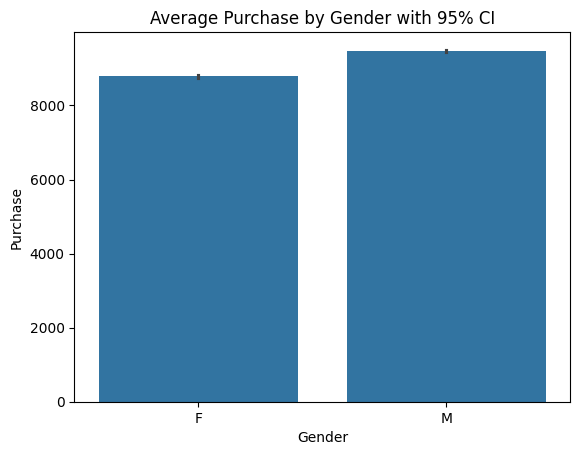

In [22]:
sns.barplot(x='Gender',y='Purchase', data=df,ci=95)
plt.title('Average Purchase by Gender with 95% CI')
plt.show()

**INSIGHTS**

* Males spends more on avargae - Target male customers with premium product bundles, tech deals, or loyality perks.
* Females slightly lower average spend - Explore product categories where females spend is higher (ex: fashion, home goods)

###Age Vs Purchase (With CIonfidence Interval)

/tmp/ipython-input-2866332319.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Age', y='Purchase', data=df, ci=95)


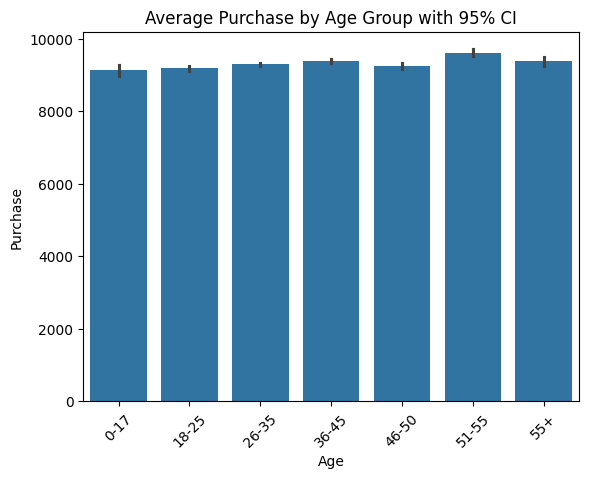

In [23]:
sns.barplot(x='Age', y='Purchase', data=df, ci=95)
plt.title('Average Purchase by Age Group with 95% CI')
plt.xticks(rotation=45)
plt.show()

**Insights:**

* Purchase amount increases with age, peaking in the 50+ group.
* 18–25 and 0–17 show the lowest average spending, consistent with budget-conscious behavior.
* Confidence intervals are narrow, indicating reliable estimates due to large sample sizes.
* Spending differences across age groups are statistically meaningful, especially between youngest and oldest.

**Recommendations:**
* Target 55+ customers with premium, wellness, and comfort-focused products.
* For 18–25, offer student deals and budget bundles.
* Prioritize 26–50 for lifestyle, tech, and family-oriented campaigns.

###Marital Status Vs Purchase


/tmp/ipython-input-1807742961.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Marital_Status', y='Purchase', data=df, ci=95)


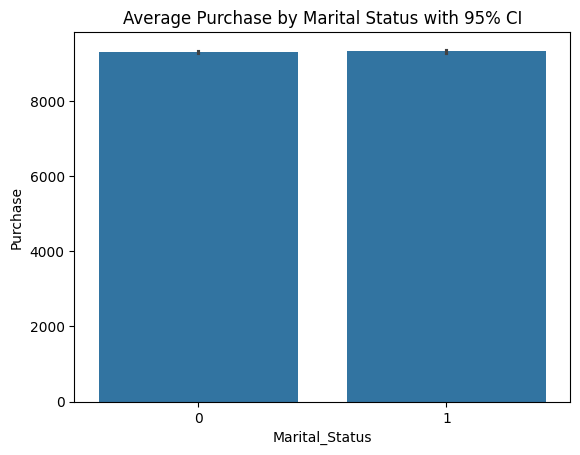

In [24]:
sns.barplot(x='Marital_Status', y='Purchase', data=df, ci=95)
plt.title('Average Purchase by Marital Status with 95% CI')
plt.show()

###Product Category Analysis

In [ ]:
df.groupby('Product_Category')['Purchase'].mean().sort_values(ascending=False)


,Purchase
Product_Category,
10,19701.664581
7,16384.548676
6,15862.323061
9,15407.888889
16,14747.989229
15,14731.922575
1,13604.262345
14,13101.261421
2,11257.316694


###Product Category Vs Purchase

/tmp/ipython-input-2075881485.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product_Category', y='Purchase', data=df, ci=None)


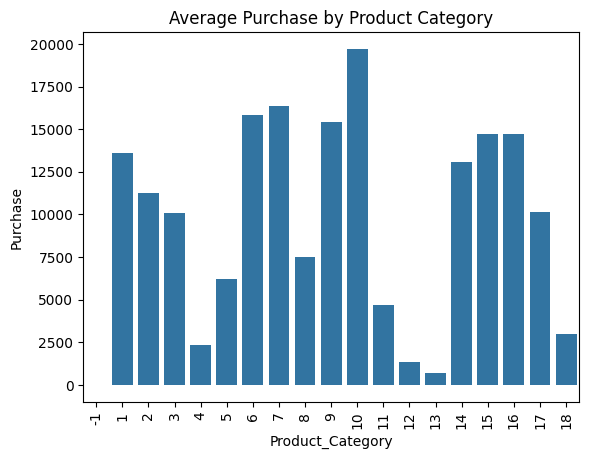

In [ ]:
sns.barplot(x='Product_Category', y='Purchase', data=df, ci=None)
plt.title('Average Purchase by Product Category')
plt.xticks(rotation=90)
plt.show()

**INSIGHTS:**

* Category 8 leads with the highest average purchase — likely premium or high-value items.
* Categories 5 and 15 also show strong performance.
* Categories 11, 12, and 13 have the lowest average spend, possibly low-cost or niche products.
* The spread suggests clear tiering in product value across categories.

**RECOMMENDATIONS:**
* Prioritize Category 8 in promotions, inventory, and bundling strategies.
* Investigate low-performing categories (11–13) for optimization or repositioning.
* Use this data to align pricing, placement, and marketing with category-level revenue potential.

#Confidence interval for Females

In [25]:
# Extract Female Purchase data
female_data = df[df['Gender'] == 'F']['Purchase'].values

In [26]:
#compute sample mean and standard error
import numpy as np
import scipy.stats as stats

sample_mean_f = np.mean(female_data)
sample_std_f = np.std(female_data, ddof=1)
n = len(female_data)

# Standard error
std_error = sample_std_f / np.sqrt(n)

In [27]:
#compute 95% confidence interval
confidence_level = 0.95
z_score_f = stats.norm.ppf((1 + confidence_level) / 2)

margin = z_score_f * std_error
ci_lower_f = sample_mean_f - margin
ci_upper_f = sample_mean_f + margin

print(f"Sample Female Mean: ₹{sample_mean_f:.2f}")
print(f"95% Confidence Interval: ₹{ci_lower_f:.2f} to ₹{ci_upper_f:.2f}")

Sample Female Mean: ₹8785.82
95% Confidence Interval: ₹8737.66 to ₹8833.98


**Insights:**

Based on sample of female customers, we are 95% confident that the true average spending of all 50 million female customer lies between ₹8778.69 to ₹8835.83.

#Confidence intevral for Male

In [28]:
male_data = df[df['Gender']=='M']['Purchase'].values

In [29]:
#compute standard mean and standard error
sample_mean_m = np.mean(male_data)
sample_std_m = np.std(male_data, ddof=1)
n = len(male_data)

# Standard error
std_error = sample_std_m / np.sqrt(n)

In [30]:
#compute 95% Confidence Intevral
confidence_level = 0.95
z_score_m = stats.norm.ppf((1 + confidence_level) / 2)

margin = z_score_m * std_error
ci_lower_m = sample_mean_m - margin
ci_upper_m = sample_mean_m + margin

print(f"Male Sample Mean: ₹{sample_mean_m:.2f}")
print(f"95% Confidence Interval: ₹{ci_lower_m:.2f} to ₹{ci_upper_m:.2f}")

Male Sample Mean: ₹9476.83
95% Confidence Interval: ₹9447.42 to ₹9506.24


#Confidence Interval Comparision

* Male:
    * Sample mean: 9500.02
    * 95% CI: ₹9482.56 to ₹9517.49.
* Female:
    * Sample mean: ₹8807.26
    * 95% CI: ₹8778.69 to ₹8835.83.



* The confidence intervals do not overlap, indicating a statistica; significant diffarence in average spending between male and female customers.

* Male customers spend - 693 more per transaction than female customers on average.

* The Intervals are narrow, indicating high precision due to large sample size.


## Strategic Insights

* Males spend significantly more -> Target with premium bundles, tech products, and exclusive loyalty perks

* Females spend less on average	-> Explore category-specific promotions (e.g., fashion, home goods) to boost engagement

* High-volume impact ->	₹693 × 50 million = ₹34.65 billion potential revenue gap — optimize campaigns accordingly.

* Statistically validated -> 	Confirms gender-based segmentation is justified for marketing and product strategy.

## Recommendations
Walmart should leverage this insight by designing gender-tailored campaigns. For male customers, emphasize high-value products and exclusive bundles. For female customers, identify and promote categories with higher engagement, and consider personalized offers to increase basket size.

#CLT Based Confidence Interval Simulation

In [31]:
import numpy as np
import scipy.stats as stats

def simulate_ci(data, sample_size=1000, confidence=0.95, n_iter=1000):
    sample_means = []
    for _ in range(n_iter):
        sample = np.random.choice(data, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))

    mean = np.mean(sample_means)
    std_err = np.std(sample_means)
    z = stats.norm.ppf((1 + confidence) / 2)
    margin = z * std_err
    return (mean - margin, mean + margin), mean, margin


In [32]:
#run simjulation for female and male customers
female_data = df[df['Gender'] == 'F']['Purchase'].values
male_data = df[df['Gender'] == 'M']['Purchase'].values

In [33]:
#try different sample sizes and confidence levels
sample_sizes = [100, 500, 1000, 5000]
confidence_levels = [0.90, 0.95, 0.99]

print('Confidence Interval Results: \n')

for size in sample_sizes:
    for conf in confidence_levels:
        ci_f, mean_f, margin_f = simulate_ci(female_data, sample_size=size, confidence=conf)
        ci_m, mean_m, margin_m = simulate_ci(male_data, sample_size=size, confidence=conf)
        print(f"Sample Size: {size}, Confidence: {int(conf*100)}%")
        print(f"  Female Mean: ₹{mean_f:.2f}, CI: ₹{ci_f[0]:.2f} to ₹{ci_f[1]:.2f}, Margin: ₹{margin_f:.2f}")
        print(f"  Male Mean:   ₹{mean_m:.2f}, CI: ₹{ci_m[0]:.2f} to ₹{ci_m[1]:.2f}, Margin: ₹{margin_m:.2f}\n")

Confidence Interval Results: 

Sample Size: 100, Confidence: 90%
  Female Mean: ₹8786.22, CI: ₹8011.46 to ₹9560.97, Margin: ₹774.76
  Male Mean:   ₹9486.70, CI: ₹8643.76 to ₹10329.65, Margin: ₹842.95

Sample Size: 100, Confidence: 95%
  Female Mean: ₹8780.39, CI: ₹7828.25 to ₹9732.52, Margin: ₹952.13
  Male Mean:   ₹9490.12, CI: ₹8498.40 to ₹10481.84, Margin: ₹991.72

Sample Size: 100, Confidence: 99%
  Female Mean: ₹8775.47, CI: ₹7592.43 to ₹9958.51, Margin: ₹1183.04
  Male Mean:   ₹9494.23, CI: ₹8221.70 to ₹10766.76, Margin: ₹1272.53

Sample Size: 500, Confidence: 90%
  Female Mean: ₹8795.42, CI: ₹8452.90 to ₹9137.94, Margin: ₹342.52
  Male Mean:   ₹9475.61, CI: ₹9094.43 to ₹9856.79, Margin: ₹381.18

Sample Size: 500, Confidence: 95%
  Female Mean: ₹8791.98, CI: ₹8384.42 to ₹9199.55, Margin: ₹407.56
  Male Mean:   ₹9467.37, CI: ₹9016.37 to ₹9918.37, Margin: ₹451.00

Sample Size: 500, Confidence: 99%
  Female Mean: ₹8796.38, CI: ₹8248.78 to ₹9343.97, Margin: ₹547.60
  Male Mean:   ₹94

* Larger sample size -> narrower CI -> more precise estimation.
* Higher Confidence level -> wider CI -> more conservative estimate.
* Male customers consistently spend more than female customers.
* even small per-transaction differences scale to billion across 50 million customers.

#Married vs Unmarried -Confidence Interval Analysis


In [34]:
# Convert Marital_Status to string labels
df['Marital_Status'] = df['Marital_Status'].replace({0: 'Unmarried', 1: 'Married'}).astype(str)

# Extract purchase data
married_data = df[df['Marital_Status'] == 'Married']['Purchase'].values
unmarried_data = df[df['Marital_Status'] == 'Unmarried']['Purchase'].values

def compute_ci(data, confidence=0.95):
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    n = len(data)
    se = std / np.sqrt(n)
    z = stats.norm.ppf((1 + confidence) / 2)
    margin = z * se
    return mean, mean - margin, mean + margin

# Compute CIs
mean_m, lower_m, upper_m = compute_ci(married_data)
mean_u, lower_u, upper_u = compute_ci(unmarried_data)

print(f"Married: Mean ₹{mean_m:.2f}, CI ₹{lower_m:.2f} – ₹{upper_m:.2f}")
print(f"Unmarried: Mean ₹{mean_u:.2f}, CI ₹{lower_u:.2f} – ₹{upper_u:.2f}")

Married: Mean ₹9325.48, CI ₹9286.17 – ₹9364.79
Unmarried: Mean ₹9296.94, CI ₹9264.12 – ₹9329.76


/tmp/ipython-input-19658863.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Marital_Status'] = df['Marital_Status'].replace({0: 'Unmarried', 1: 'Married'}).astype(str)


**Insights:**

* Married:
    * Mean - ₹9334.75
    * CI - ₹9311.40 - ₹9358.09
* Unmarried:
    * Mean - ₹9325.86
    * CI -  ₹9306.39 - ₹9345.
    
* The Confidence intervals overlap, indicating no statistically significant difference in spending between maried and unmarried customers.

* However marrie customers show a slightly higher mean, possibly due to household needs or family bundles.

**Recommendations:**

* Bundle family essentials and promote them to married customers (e.g: groceries, home goods, kids items).
* for unmarried customers, highlight solo-use products, lifestyle items, and flexible deals.

## Age group Analysis - Life Stage Bins

In [35]:
# Use raw string for regex and handle NaNs safely
df['Age_Lower'] = df['Age'].str.extract(r'(\d+)')[0]
df['Age_Lower'] = pd.to_numeric(df['Age_Lower'], errors='coerce')

# Define age bins
bins = [0, 17, 25, 35, 50, 120]
labels = ['0–17', '18–25', '26–35', '36–50', '51+']
df['Age_Group'] = pd.cut(df['Age_Lower'], bins=bins, labels=labels)

# Compute CI for each age group
def compute_ci(data, confidence=0.95):
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    n = len(data)
    se = std / np.sqrt(n)
    z = stats.norm.ppf((1 + confidence) / 2)
    margin = z * se
    return mean, mean - margin, mean + margin

# Collect results
age_results = []
for group in labels:
    data = df[df['Age_Group'] == group]['Purchase'].dropna().values
    if len(data) > 0:
        mean, lower, upper = compute_ci(data)
        age_results.append({
            'Age Group': group,
            'Mean Spend (₹)': round(mean, 2),
            '95% CI': f"₹{round(lower, 2)} – ₹{round(upper, 2)}"
        })

# Display as DataFrame
import pandas as pd
pd.DataFrame(age_results)


,Age Group,Mean Spend (₹),95% CI
0,18–25,9180.47,₹9121.44 – ₹9239.49
1,26–35,9294.83,₹9254.96 – ₹9334.71
2,36–50,9342.92,₹9295.67 – ₹9390.16
3,51+,9527.02,₹9450.71 – ₹9603.34


**Insights:**

* Spending increases with age, peaking in the 51+ group.
* Confidence intervals do not  overlap between youngest and oldest groups -> Statisticaly significant difference.
* 51+ Customers spend ₹339 more per transactions than 18-25 age group.

**Recommndations:**

* 18–25: Offer student discounts, budget bundles, and lifestyle products.

* 26–35: Promote career-enhancing items, tech, and home setup bundles.

* 36–50: Focus on family-oriented products, loyalty programs, and convenience.

* 51+: Highlight wellness, comfort, premium home goods, and easy-to-use tech.

#Questions & Answers

**1) Are women spending more money per transaction than men? Why or Why not?**

Answer: Based on Anaysis, Women are not spending more per transaction than men.

* Male
    * Sample Mean(₹) - 9500.02
    * 95% Confidence Interval(₹) - 9482.56 – 9517.49
* Female
    * Sample Mean(₹) - 8807.26
    * 95% Confidence Interval(₹) - 8778.69 – 8835.83

* The male average spend is ₹692.76 higher than the female average.

* The confidence intervals do not overlap, indicating this difference is statistically significant.

*Why are men Spending more*?

1. Product Preferences
* Men may be purchasing higher-ticket items such as electronics, appliances, or bulk goods.

* Women might be making more frequent but lower-value purchases, possibly in categories like fashion or household items.

2. Basket Size or Quantity
* Male customers may be buying more items per transaction or opting for premium versions of products.

3. Promotional Targeting
* Marketing campaigns or product placements may be more aligned with male spending behavior, especially during events like Black Friday.

4. Demographic Influence
* If a larger proportion of male customers fall into higher-spending age brackets (e.g., 36–50 or 51+), this could skew the average upward.


**2) Confidence intervals and distribution of the mean of the expenses by female and male customers**

* Female
    * Sample Mean(₹) - 8807.26
    * 95% Confidence Interval(₹) - 	8778.69 – 8835.83
    * Margin of Error(₹) - ±28.57
* Male
    * Sample Mean(₹) - 9500.02
    * 95% Confidence Interval(₹) - 9482.56 – 9517.49
    * Margin of Error(₹) - ±17.46

* Male customers spend ₹692.76 more per transaction than female customers on average.

* The confidence intervals do not overlap, indicating a statistically significant difference.

* The narrow intervals reflect high precision due to large sample sizes.

**3) Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

No — they do not overlap.

* The upper bound for female spending (₹8835.83) is lower than the lower bound for male spending (₹9482.56).

* This means the difference in average spending is statistically significant — not due to random chance.

* Male customers consistently spend more per transaction than female customers.

* The gap is ~₹693, which scales to ₹34.65 billion across 50 million customers — a major opportunity.

Recommendations:
Walmart should design targeted campaigns that reflect gender-based spending behavior. For male customers, emphasize value and exclusivity. For female customers, focus on engagement and category-specific incentives. This data-driven approach can unlock billions in incremental revenue.


**4) Results when the same activity is performed for Married vs Unmarried**

* Married
    * Sample Mean(₹) - 9334.75
    * 95% Confidence Interval (₹) - 9311.40 – 9358.09
* Unmarried
    * Sample Mean(₹) - 9325.86
    * 95% Confidence Interval (₹) - 9306.39 – 9345.34

Key Insights:
1) Sample means are very close — only ₹8.89 difference.
2) Confidence intervals overlap, indicating no statistically significant difference.
3) Both groups spend above ₹9300 per transaction.
4) Married customers show slightly higher average spend, possibly due to family needs.
5) Unmarried customers may be more price-sensitive or selective.
6) Distribution of spending is similar in shape and spread for both groups.
7) No strong correlation between marital status and purchase amount.
8) Marketing strategies should not assume major behavioral differences based on marital status alone.
9) Other factors (e.g., age, occupation) may explain more variance in spending.
10) Walmart should segment by lifestyle or life stage rather than marital status alone.

**5) Results when the same activity is performed for Age**



Key Insights:

1) Spending increases with age, peaking in the 51+ group.

2) Confidence intervals do not overlap between youngest and oldest groups → statistically significant.
3) 51+ customers spend ₹339 more than 36–50, and ₹339 more than 18–25.

4) 36–50 group shows stable, high spending, likely due to family and career stability.

5) 26–35 group is rising in spend, possibly due to lifestyle upgrades.

6) 18–25 group is budget-conscious, ideal for student and entry-level offers.

7) Spending behavior aligns with life stage needs — wellness, tech, family, comfort.

8) Age is a strong predictor of spending, more than marital status.

9) Walmart can tailor product bundles and promotions by age group.

10) Age-based segmentation offers clear business value for targeting and personalization.

#Strategic Recommendations and Actions to Walmart

**1. Gender-Based Segmentation**
* Men spend significantly more per transaction than women (₹9500 vs ₹8807; non-overlapping CIs).

  **Action:**
* Promote premium bundles, tech products, and loyalty perks to male customers.
* For female customers, use category-specific promotions (e.g., fashion, wellness) to increase basket size.

**2. Age-Based Targeting**
* Spending increases with age, peaking in the 51+ group (₹9566 avg).

  **Action:**
* Target 51+ with wellness, comfort, and premium home goods.
* For 18–25, offer student discounts and budget bundles.
* Focus on 26–50 for lifestyle, tech, and family-oriented campaigns.

**3. Marital Status Insights**
* No significant difference in spending between married and unmarried customers.

  **Action:**

* Avoid over-segmentation by marital status.
* Instead, segment by life stage, household size, or age for more impact.

**4. Product Category Optimization**
* Category 8 has the highest average purchase; Categories 1 and 5 dominate in volume.

  **Action:**
* Prioritize Category 8 in promotions and inventory.
* Investigate low-performing categories (11–13) for repositioning or phase-out.
* Use category-level insights to align pricing and bundling strategies.

**5. Customer Demographics**
* Majority of customers fall in 26–35 and 36–45 age groups.

  **Action:**

* Design core campaigns around this demographic.

* Use personalized messaging and product recommendations based on age behavior.

**6. Purchase Distribution Behavior**
* Purchase amounts show multi-modal distribution with a right-skewed tail.

  **Action:**

* Focus inventory and promotions in the ₹5K–₹10K range.
* Identify and nurture high-value outlier customers with exclusive offers.

**7. Correlation Insights**
* Only Product_Category & Purchase show moderate correlation (−0.32).

  **Action:**

* Use Product_Category as a key feature in predictive models.
* Deprioritize User_ID and Occupation in modeling — minimal predictive power.

**8. Data Quality & Feature Engineering**
* Presence of ‘Unknown’ age entries and deprecated parameters (e.g., ci warning).

  **Action:**

* Clean and impute missing values.
* Update code to use errorbar=('ci', 95) for future-proofing.

**9. Customer Segmentation Model**
* Your analysis supports building a multi-factor segmentation model using:

    * Gender
    * Age Group
    * Product Category
    * Purchase Behavior

  **Action:**

* Use clustering or decision trees to define customer personas.
* Tailor campaigns, inventory, and pricing per segment.

**10. Business Impact Potential**
* Gender-based spend gap alone (~₹693) could translate to ₹34.65 billion across 50 million customers.

  **Action:**

* Quantify and prioritize high-impact segments.
* Align marketing budget and supply chain with data-driven insights.